In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Parte 1: Análisis Exploratorio de Datos (EDA)

 1. Carga y Exploración de Datos:

       * Cargar el dataset y revisar la estructura básica.
       * Descripción de las variables y su distribución.
       * Detección y tratamiento de valores nulos.
       * Identificación y tratamiento de outliers.
       * Análisis de correlación entre variables.


In [2]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = 'C:/Users/ENRIF/Desktop/Curso Coding Dojo/practicas_coding_dojo/machine_learning/ejercicios_core/data/Automobile_data.csv'
    
    df = cargar_datos(ruta_archivo)  

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
##Se detectaron valores con ? en columnas del dataset por lo que se rellenan con nan
df = df.replace('?', np.nan)

# Se remplazan valores nulos en la columna 'price' con 0
df['price'] = df['price'].fillna(0)

##Verificacion y ajustes de tipos de datos
print("Dtype Original")
print(df.dtypes)

#Usando Dic para modificar el tipo de datos. Sacado de sitio web https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {'symboling': int,
                'normalized-losses': 'string',
                'make': 'string',
                'fuel-type': 'string',
                'aspiration': 'string',
                'num-of-doors': 'string',
                'body-style': 'string',
                'drive-wheels': 'string',
                'engine-location': 'string',
                'wheel-base': float,
                'length': float,
                'width': float,
                'height': float,
                'curb-weight': int,
                'engine-type': 'string',  
                'num-of-cylinders': 'string', 
                'engine-size': int,
                'fuel-system': 'string',
                'bore': 'string',
                'stroke': 'string',
                'compression-ratio': float,
                'horsepower': 'string',
                'peak-rpm': 'string',
                'city-mpg': int,
                'highway-mpg': int,
                'price': int                
                }

df = df.astype(convert_dict)
## Siguen siendo object ya que pandas considera str como objeto, pero esto ya fue aplicado para asegurar el tipo
print("Dtype Modificado")
print(df.dtypes)
##Verificacion y ajustes de tipos de datos
print(df.info())

Dtype Original
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
Dtype Modificado
symboling                     int32
normalized-losses    string[python]
make                 string[python]
fuel-type            string[python]
aspiration           string[python]
num-of-doors        

### Manejar valores faltantes

In [4]:
## Se detectan valores nulos luego de modificar los datos con ? 
# Identificar valores faltantes
def identificar_valores_faltantes(df):
    print("Valores faltantes en el dataset")
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    
    # Crear DataFrame con los resultados
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na_df = pd.DataFrame(data=aux)
    
    # Ordenar el DataFrame por el porcentaje de valores faltantes
    return na_df.sort_values(by='Na en %', ascending=False)

# Rellenar valores faltantes
def rellenar_valores_faltantes(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Procesar solo columnas con valores faltantes
            if df[column].dtype == 'string':  # Si la columna es de tipo texto
                df[column].fillna('Desconocido', inplace=True)  # Rellenar con 'Desconocido'
            elif df[column].dtype in ['int32','int64', 'float64']:  # Si la columna es numérica
                moda = df[column].mode()[0]  # Obtener la moda (valor más frecuente)
                df[column].fillna(moda, inplace=True)  # Rellenar con la moda
    return df

# Identificar valores faltantes
print("Valores faltantes en el dataset antes de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)

# Rellenar valores faltantes y verificar luego de la limpieza
df = rellenar_valores_faltantes(df)
print("Valores faltantes en el dataset despues de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)

Valores faltantes en el dataset antes de la limpieza
Valores faltantes en el dataset
                   datos sin NAs en q  Na en q  Na en %
normalized-losses                 164       41    20.00
stroke                            201        4     1.95
bore                              201        4     1.95
peak-rpm                          203        2     0.98
num-of-doors                      203        2     0.98
horsepower                        203        2     0.98
symboling                         205        0     0.00
engine-type                       205        0     0.00
highway-mpg                       205        0     0.00
city-mpg                          205        0     0.00
compression-ratio                 205        0     0.00
fuel-system                       205        0     0.00
engine-size                       205        0     0.00
num-of-cylinders                  205        0     0.00
curb-weight                       205        0     0.00
height             

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_5624\2774899454.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Desconocido', inplace=True)  # Rellenar con 'Desconocido'


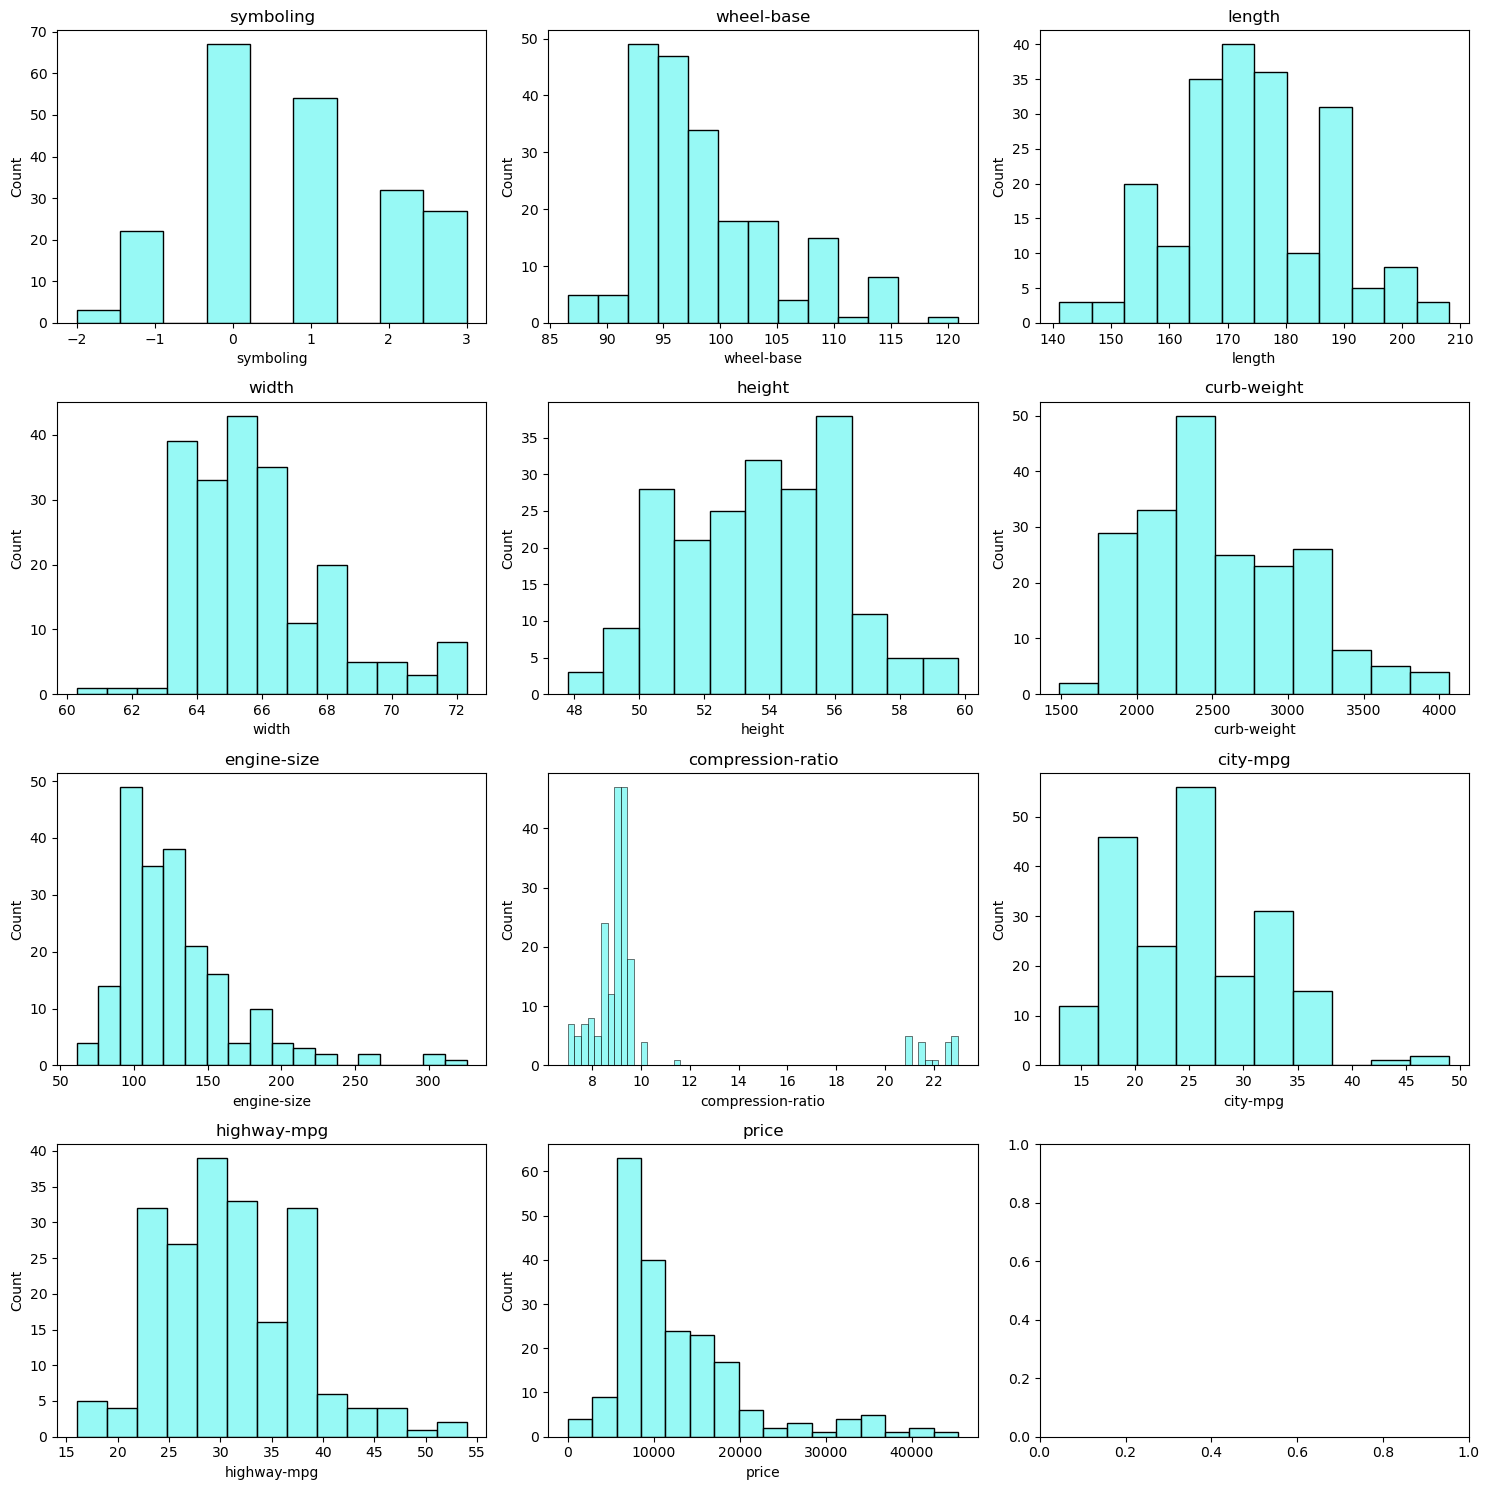

In [5]:
##Distribucion de datos

data_numerico = df.select_dtypes(include=['int32','int64', 'float64'])
def plot_grafico_outliers(features, df):
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.histplot(x=df[feature], ax=axes[row, col], color="#75f8f2")
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(data_numerico,df)


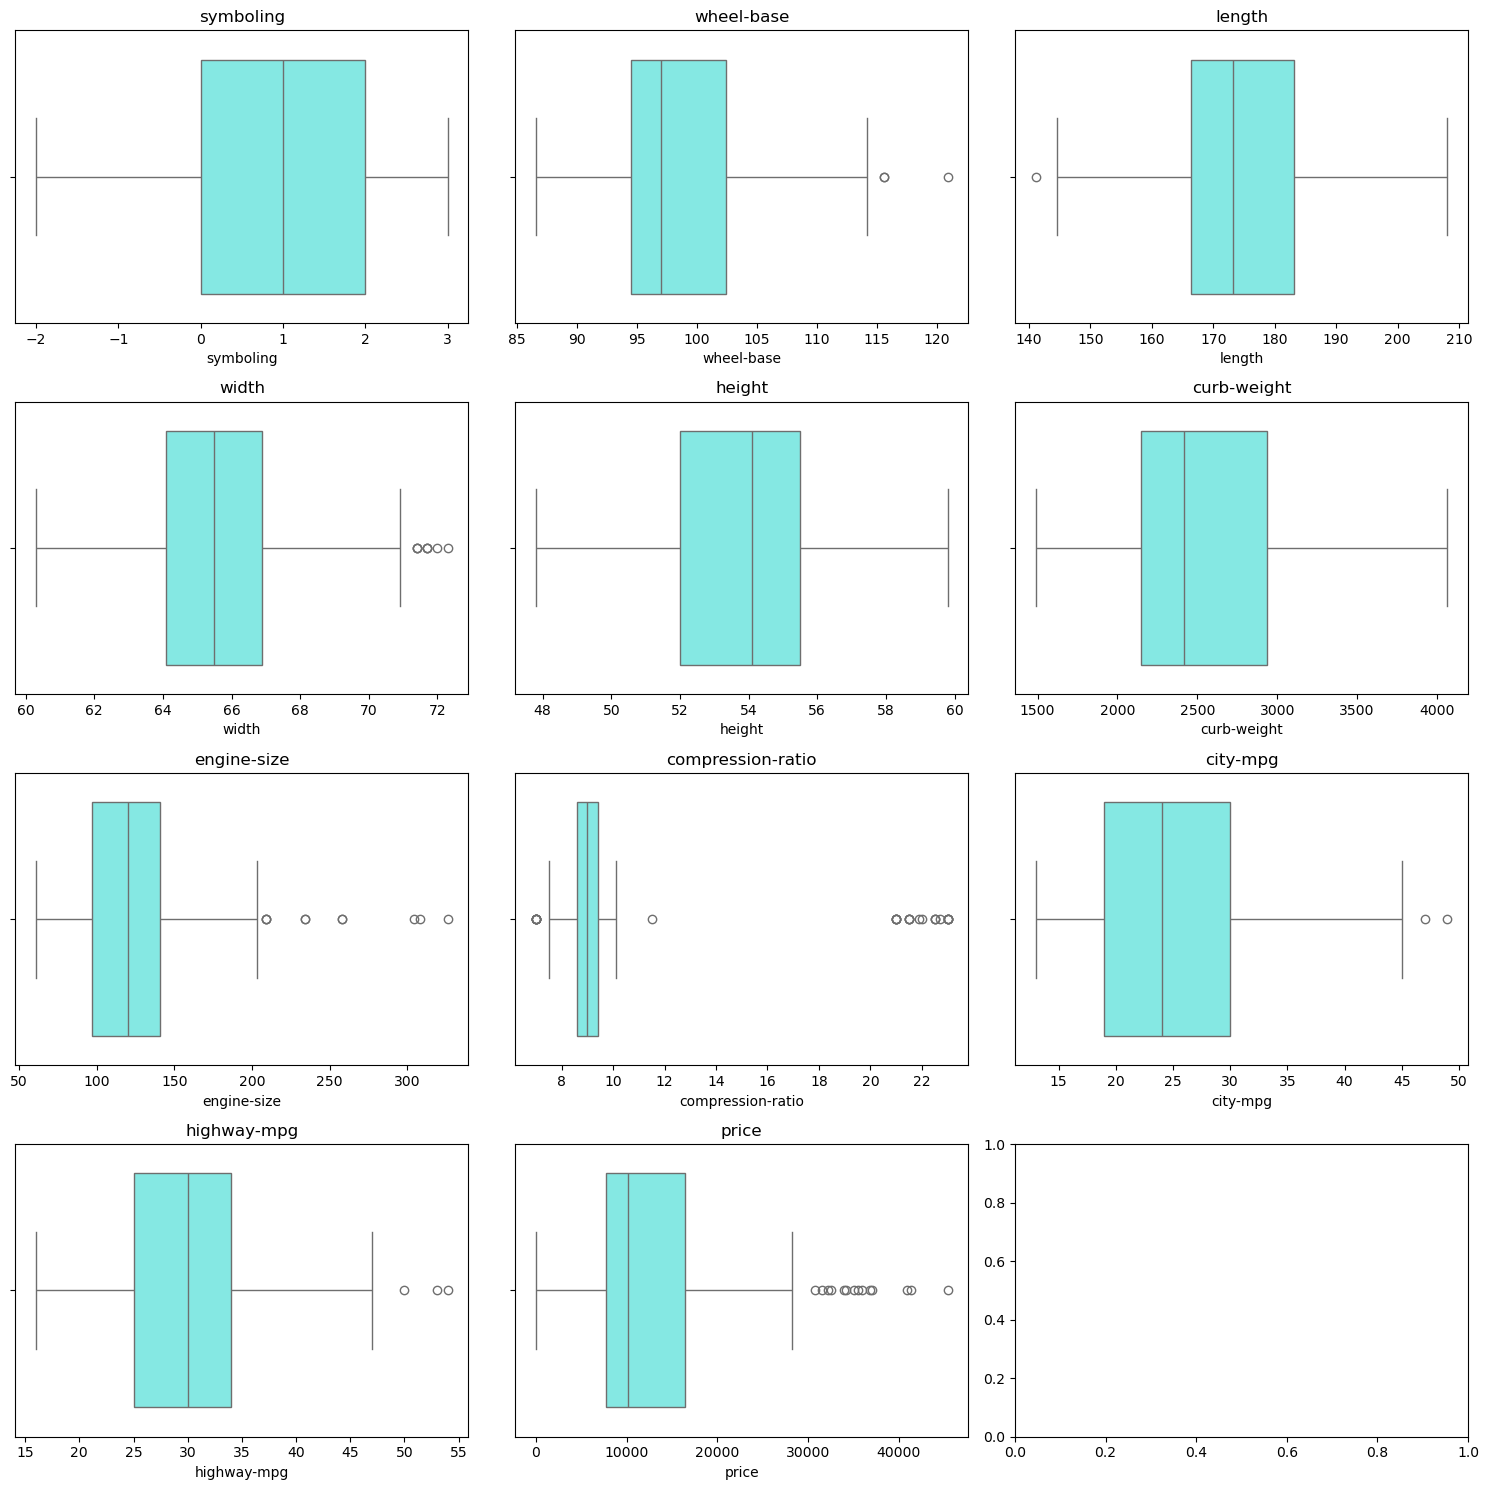

In [6]:
##Deteccion de datos anomalos

def plot_grafico_outliers(features, df):
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.boxplot(x=df[feature], ax=axes[row, col], color="#75f8f2")
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(data_numerico,df)

##### Ya que estamos verificando valores para una clasificacion de precios no amerita modificar los outliers ya que estos representan valores extremos que pueden presentarse.

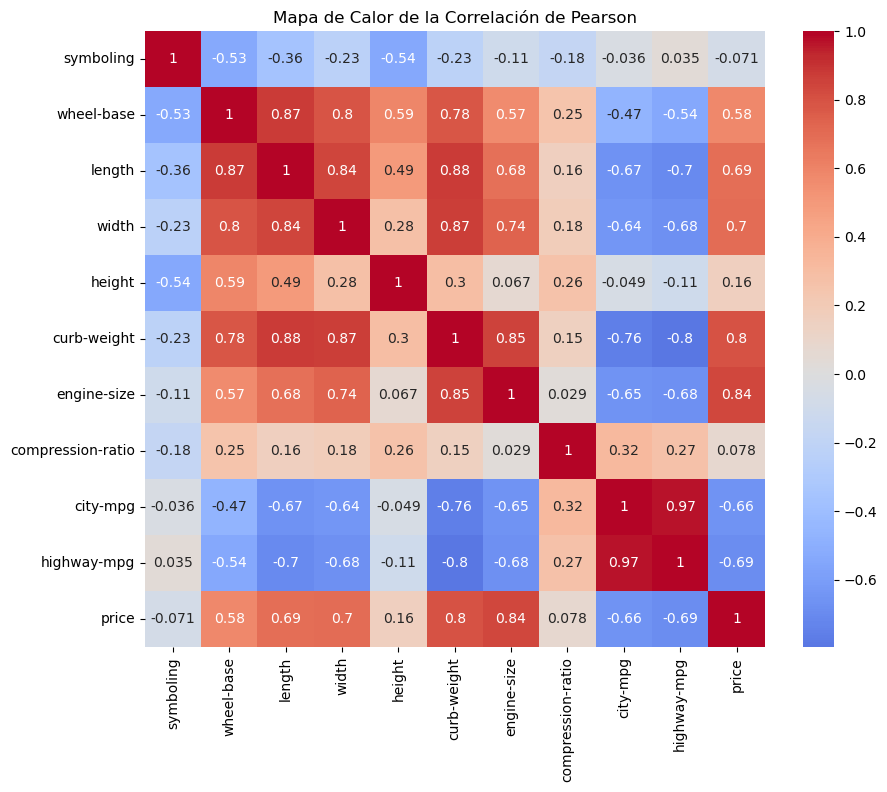

In [7]:
correlation_matrix = data_numerico.corr(method='pearson')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

##### Las variables engine-size, curb-weight son las de mayor realacion positiva con price con 0.84 y 0.80 respectivamente, ademas wheel-base y length con 0.58 y 0.69 son tambien otras variables importantes. Finalmente Higway-mpg y city-mpg con -0.69 y -0.66 son negativamente inversos.

Parte 2: Preparación de Datos

 2. Preprocesamiento:

    * Selección de características importantes.
    * Transformación de variables categóricas.
    * División del conjunto de datos en entrenamiento y prueba.
    * Escalado de características.


In [8]:
##Separar datos de prueba y de entrenamiento
# Filtrar las filas donde 'price' es igual a 0 ya que anteriormente modifique los valores con ? estos serviran para validar el modelo
df_price_zero = df[df['price'] == 0]

# Eliminar las filas donde 'price' es igual a 0 en el DataFrame original
df = df[df['price'] != 0]

# Separar X (características) y y (variable dependiente)
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # La última columna

### Transfom de los datos con pipeline
# Separar características numéricas y categóricas
dato_numerico = X.select_dtypes(include=['float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['string']).columns.tolist()

# Definir transformaciones
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# En este dataset no hay categóricas, pero se puede añadir una columna categórica ficticia para la práctica
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, dato_numerico),
        ('cat', categorical_transformer, categorical_features)
    ])

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar preprocesamiento x_train y x_test
X_transformed = pipeline.fit_transform(X)


print("Preprocesamiento completado. Datos transformados listos para modelar.")

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

Preprocesamiento completado. Datos transformados listos para modelar.


### Feature selection (Preguntar sobre este punto!!)

In [ ]:
# Seleccionar las 5 mejores características utilizando SelectKBest con f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # No se usa fit en test, solo transform

c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\feature_selection\_univari

Parte 3: Modelos de Regresión
1. Linear regression
2. KNN
3. Decision Tree
    

In [21]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mseLR = mean_squared_error(y_test, y_pred)
r2LR = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mseLR}')
print(f'R-cuadrado: {r2LR}')

Error Cuadrático Medio: 26071971.082120903
R-cuadrado: 0.7869010319994301


In [22]:
# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mseKNN = mean_squared_error(y_test, y_pred)
r2KNN = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mseKNN}')
print(f'R-cuadrado: {r2KNN}')

Error Cuadrático Medio: 41578204.807804875
R-cuadrado: 0.6601610017151497


In [23]:
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test)

# Evaluar el modelo
mseDT = mean_squared_error(y_test, y_pred)
r2DT = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mseDT}')
print(f'R-cuadrado: {r2DT}')

Error Cuadrático Medio: 13240860.347560976
R-cuadrado: 0.8917759740290653


Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

    * Comparar los resultados de los tres modelos en términos de MSE y R².
    * Discusión sobre las diferencias en el rendimiento de los modelos.


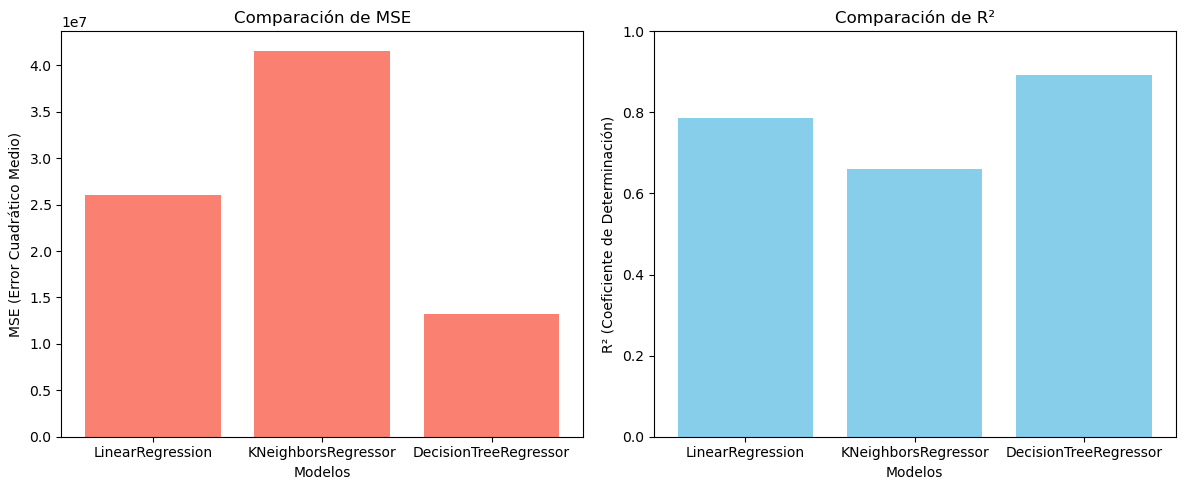

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de ejemplo de MSE y R² para los tres modelos
model_names = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor']
mse_values = [mseLR, mseKNN, mseDT]  # Ejemplo de valores de MSE
r2_values = [r2LR, r2KNN, r2DT]  # Ejemplo de valores de R²

# Crear subgráficos para MSE y R²
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para el MSE
ax[0].bar(model_names, mse_values, color='salmon')
ax[0].set_title('Comparación de MSE')
ax[0].set_xlabel('Modelos')
ax[0].set_ylabel('MSE (Error Cuadrático Medio)')

# Gráfico de barras para el R²
ax[1].bar(model_names, r2_values, color='skyblue')
ax[1].set_title('Comparación de R²')
ax[1].set_xlabel('Modelos')
ax[1].set_ylabel('R² (Coeficiente de Determinación)')
ax[1].set_ylim(0, 1)  # Para que todos los valores de R² se representen en una escala de 0 a 1

plt.tight_layout()
plt.show()


En esta comparación de modelos:

* MSE: El modelo de DecisionTreeRegressor tiene el menor MSE, lo que indica que comete menos errores en promedio que los otros modelos. KNeighborsRegressor tiene el MSE más alto, lo que sugiere que es menos preciso en este caso.

* R²: DecisionTreeRegressor también muestra el valor más alto de R², indicando que explica mejor la variabilidad de los datos en comparación con los otros modelos.

Conclusion: Entre estos 3 modelos decisiontree tiene mejor prediccion que los otros ya que cuenta con un menor MSE y valor mas alto de R2

Futuras implementaciones:
* Probar gridsearch para realizar modificaciones en los hyperparametros.
* Implementa validación cruzada para obtener una estimación más robusta del rendimiento de los modelos y evitar el sobreajuste.
* Feature selection y Feature Engineering para seleccion de features que aporten al modelo y eviten ruido
